## Initial setup



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# If the file is in your Google Drive
df = pd.read_csv('/content/drive/My Drive/set_your_path/Employee.csv')

In [ ]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [ ]:
df.tail()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0
4652,Bachelors,2015,Bangalore,3,33,Male,Yes,4,0


In [ ]:
df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

## (a) Data mining process

### (i) Q-Q Plots, histograms & transformations

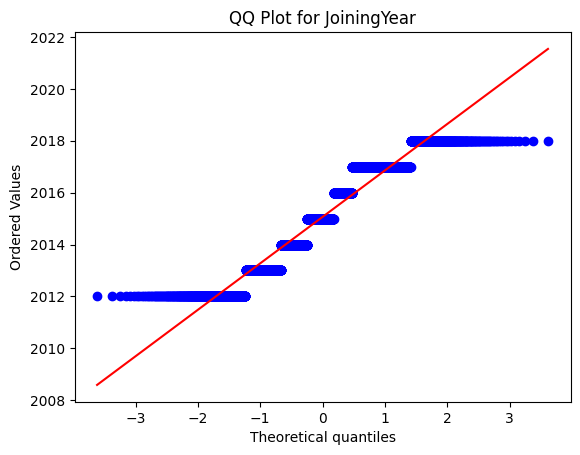

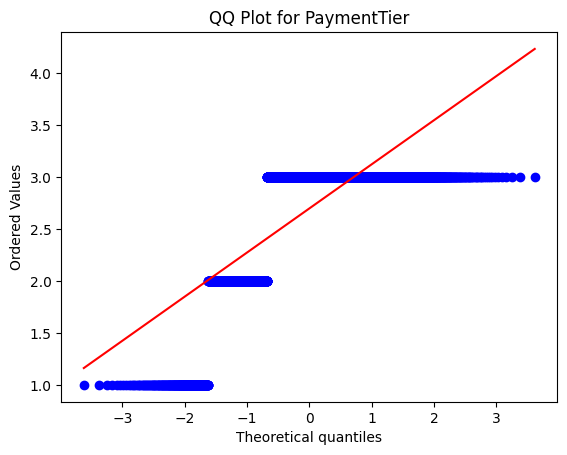

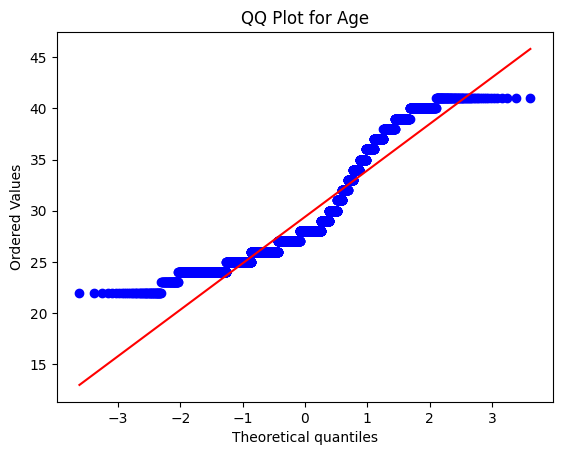

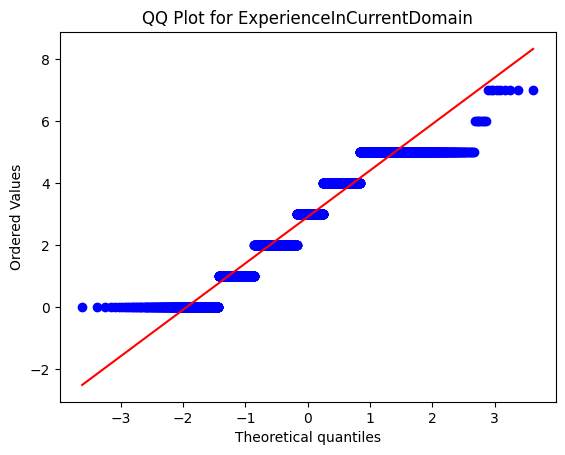

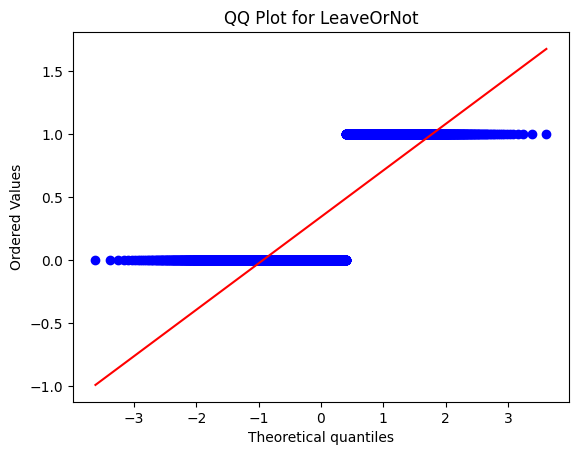

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stats

features = ['JoiningYear', 'PaymentTier', 'Age', 'ExperienceInCurrentDomain', 'LeaveOrNot']

for col in features :
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f'QQ Plot for {col}')
    plt.show()

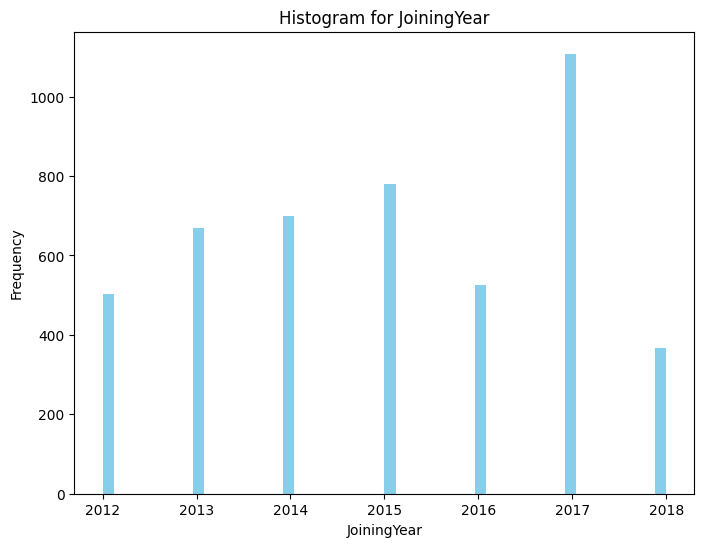

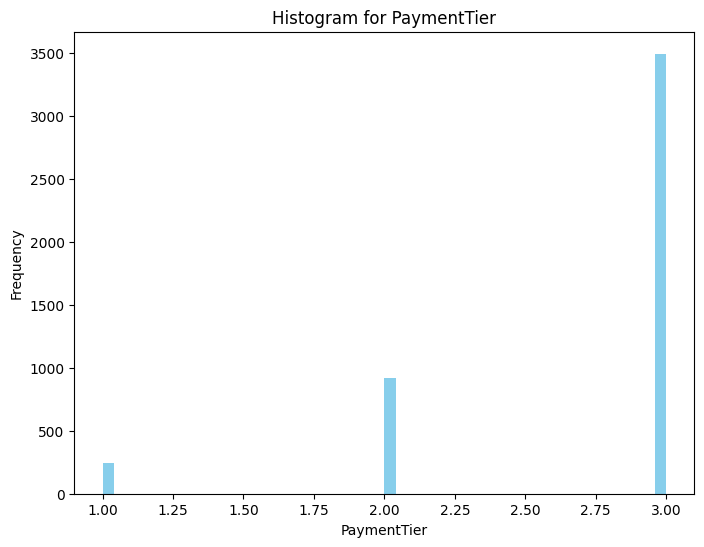

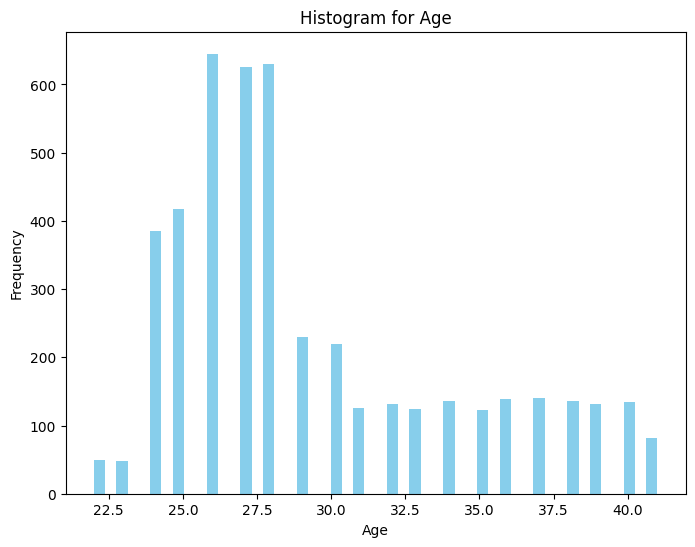

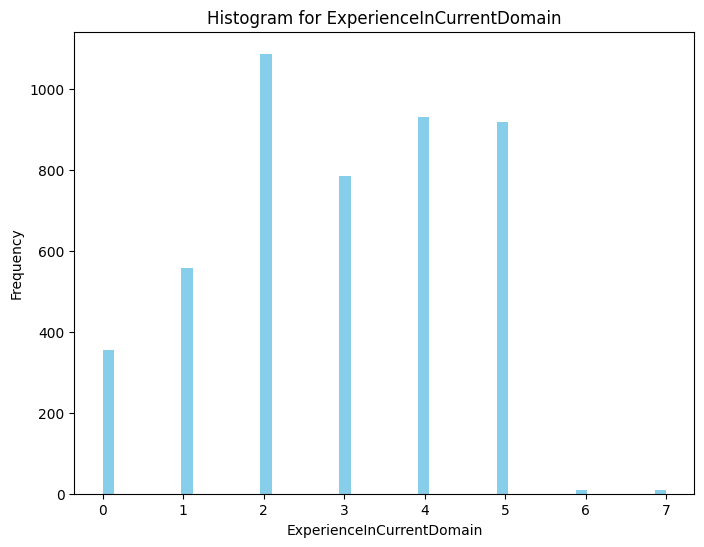

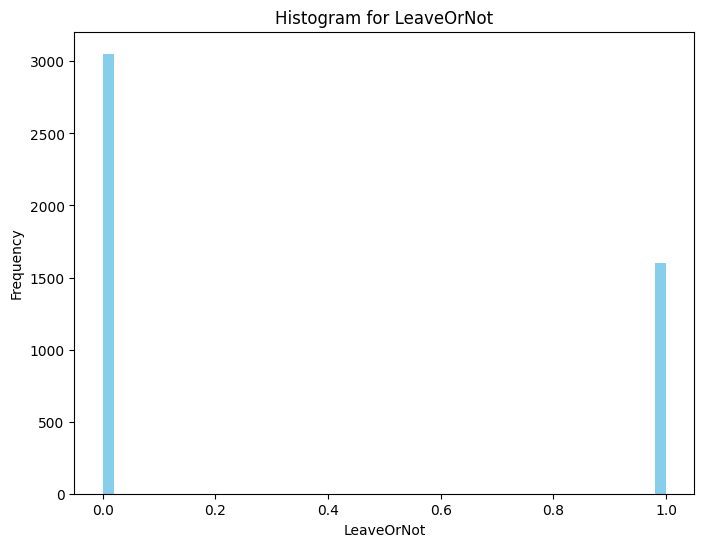

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in features:
    plt.figure(figsize=(8, 6))
    plt.hist(df[col], bins=50, color='skyblue')
    plt.title(f'Histogram for {col}')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

Since the features are not continuous, QQ plots & histograms doesn't give much information. Therefore no transformation is needed.

### (ii) Feature encoding

In [ ]:
df['Education'].unique()

array(['Bachelors', 'Masters', 'PHD'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Education_Encoded'] = label_encoder.fit_transform(df['Education'])
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,Education_Encoded
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1,0
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1,1
...,...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0,0
4649,Masters,2013,Pune,2,37,Male,No,2,1,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0,0


Since Education has an order, I used "ordered label encoding".


In [ ]:
df['JoiningYear'].unique()

array([2017, 2013, 2014, 2016, 2015, 2012, 2018])

In [ ]:
df['City'].unique()

array(['Bangalore', 'Pune', 'New Delhi'], dtype=object)

In [ ]:
encoded_df = pd.get_dummies(df, columns=['City'], prefix='City')
df = encoded_df

One hot encoding used for City since there is no any order.

In [ ]:
df['PaymentTier'].unique()

array([3, 1, 2])

In [ ]:
df['Age'].unique()

array([34, 28, 38, 27, 24, 22, 23, 37, 32, 39, 29, 30, 36, 31, 25, 26, 40,
       35, 33, 41])

In [ ]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
label_encoder = LabelEncoder()
df['Gender_Encoded'] = label_encoder.fit_transform(df['Gender'])

Label encoding used to avoid unneccesary repetitions for the gender.

In [ ]:
label_encoder = LabelEncoder()
df['EverBenched_Encoded'] = label_encoder.fit_transform(df['EverBenched'])

Label encoding used since its only yes & no in the records.

In [ ]:
df['ExperienceInCurrentDomain'].unique()

array([0, 3, 2, 5, 1, 4, 7, 6])

In [ ]:
df

,Education,JoiningYear,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,Education_Encoded,City_Bangalore,City_New Delhi,City_Pune,Gender_Encoded,EverBenched_Encoded
0,Bachelors,2017,3,34,Male,No,0,0,0,1,0,0,1,0
1,Bachelors,2013,1,28,Female,No,3,1,0,0,0,1,0,0
2,Bachelors,2014,3,38,Female,No,2,0,0,0,1,0,0,0
3,Masters,2016,3,27,Male,No,5,1,1,1,0,0,1,0
4,Masters,2017,3,24,Male,Yes,2,1,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,3,26,Female,No,4,0,0,1,0,0,0,0
4649,Masters,2013,2,37,Male,No,2,1,1,0,0,1,1,0
4650,Masters,2018,3,27,Male,No,5,1,1,0,1,0,1,0
4651,Bachelors,2012,3,30,Male,Yes,2,0,0,1,0,0,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   PaymentTier                4653 non-null   int64 
 3   Age                        4653 non-null   int64 
 4   Gender                     4653 non-null   object
 5   EverBenched                4653 non-null   object
 6   ExperienceInCurrentDomain  4653 non-null   int64 
 7   LeaveOrNot                 4653 non-null   int64 
 8   Education_Encoded          4653 non-null   int64 
 9   City_Bangalore             4653 non-null   uint8 
 10  City_New Delhi             4653 non-null   uint8 
 11  City_Pune                  4653 non-null   uint8 
 12  Gender_Encoded             4653 non-null   int64 
 13  EverBenched_Encoded        4653 non-null   int64 
dtypes: int64

### (iii) Scaling & standardizing

Since data are categorical & after feature encoding we got 0, 1, 2, 3 like values, standadizing or scaling doesnt make sense.

### (iv) Feature discretization

Since data are categorical, & the numerical data exist in the dataset are nt continuous, feature descritization doesnt make sense.

## (b) MLP for binary classification

In [ ]:
df

,Education,JoiningYear,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,Education_Encoded,City_Bangalore,City_New Delhi,City_Pune,Gender_Encoded,EverBenched_Encoded
0,Bachelors,2017,3,34,Male,No,0,0,0,1,0,0,1,0
1,Bachelors,2013,1,28,Female,No,3,1,0,0,0,1,0,0
2,Bachelors,2014,3,38,Female,No,2,0,0,0,1,0,0,0
3,Masters,2016,3,27,Male,No,5,1,1,1,0,0,1,0
4,Masters,2017,3,24,Male,Yes,2,1,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,3,26,Female,No,4,0,0,1,0,0,0,0
4649,Masters,2013,2,37,Male,No,2,1,1,0,0,1,1,0
4650,Masters,2018,3,27,Male,No,5,1,1,0,1,0,1,0
4651,Bachelors,2012,3,30,Male,Yes,2,0,0,1,0,0,1,1


In [ ]:
df['LeaveOrNot'].value_counts()

0    3053
1    1600
Name: LeaveOrNot, dtype: int64

Since output class is imbalanced, I use SMOTE technique to generate synthetic data.

In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

data = df
data

,Education,JoiningYear,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,Education_Encoded,City_Bangalore,City_New Delhi,City_Pune,Gender_Encoded,EverBenched_Encoded
0,Bachelors,2017,3,34,Male,No,0,0,0,1,0,0,1,0
1,Bachelors,2013,1,28,Female,No,3,1,0,0,0,1,0,0
2,Bachelors,2014,3,38,Female,No,2,0,0,0,1,0,0,0
3,Masters,2016,3,27,Male,No,5,1,1,1,0,0,1,0
4,Masters,2017,3,24,Male,Yes,2,1,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,3,26,Female,No,4,0,0,1,0,0,0,0
4649,Masters,2013,2,37,Male,No,2,1,1,0,0,1,1,0
4650,Masters,2018,3,27,Male,No,5,1,1,0,1,0,1,0
4651,Bachelors,2012,3,30,Male,Yes,2,0,0,1,0,0,1,1


In [ ]:
data = data.drop('Education',axis=1)
data = data.drop('Gender',axis=1)
data = data.drop('EverBenched',axis=1)

In [ ]:
data

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot,Education_Encoded,City_Bangalore,City_New Delhi,City_Pune,Gender_Encoded,EverBenched_Encoded
0,2017,3,34,0,0,0,1,0,0,1,0
1,2013,1,28,3,1,0,0,0,1,0,0
2,2014,3,38,2,0,0,0,1,0,0,0
3,2016,3,27,5,1,1,1,0,0,1,0
4,2017,3,24,2,1,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4648,2013,3,26,4,0,0,1,0,0,0,0
4649,2013,2,37,2,1,1,0,0,1,1,0
4650,2018,3,27,5,1,1,0,1,0,1,0
4651,2012,3,30,2,0,0,1,0,0,1,1


In [ ]:
# Assuming 'LeaveOrNot' is the target variable
X = data.drop('LeaveOrNot', axis=1)
y = data['LeaveOrNot']

In [ ]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
X_resampled

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,Education_Encoded,City_Bangalore,City_New Delhi,City_Pune,Gender_Encoded,EverBenched_Encoded
0,2017,3,34,0,0,1,0,0,1,0
1,2013,1,28,3,0,0,0,1,0,0
2,2014,3,38,2,0,0,1,0,0,0
3,2016,3,27,5,1,1,0,0,1,0
4,2017,3,24,2,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...
6101,2014,2,24,2,0,0,0,1,0,0
6102,2013,3,25,3,0,1,0,0,0,0
6103,2015,3,29,0,0,0,0,1,0,0
6104,2014,1,26,4,0,0,0,1,0,0


In [ ]:
y_resampled.value_counts()

0    3053
1    3053
Name: LeaveOrNot, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)

In [ ]:
y_pred = mlp.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.5057283142389526
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_pred = mlp.predict(X_test)

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.51      1.00      0.67       618
           1       0.00      0.00      0.00       604

    accuracy                           0.51      1222
   macro avg       0.25      0.50      0.34      1222
weighted avg       0.26      0.51      0.34      1222

[[618   0]
 [604   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [(64, 32), (128, 64), (256, 128)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
}

# Create an MLPClassifier
mlp = MLPClassifier(max_iter=1000, random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(mlp, param_grid, scoring='f1', cv=5)

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test data
y_pred = best_model.predict(X_test)


Best Hyperparameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (256, 128)}


In [ ]:
# Print classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       618
           1       0.49      1.00      0.66       604

    accuracy                           0.49      1222
   macro avg       0.25      0.50      0.33      1222
weighted avg       0.24      0.49      0.33      1222

[[  0 618]
 [  0 604]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## (c) Applying techniques to predict value of y

### (i) Weight initialization techniques

#### Xavier initialization

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=1000, random_state=42, initialization='glorot')


TypeError: ignored

#### He initialization

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=1000, random_state=42, initialization='he')

TypeError: ignored

### (ii) Activation functions

#### Sigmoid Activation

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), activation='logistic', solver='adam', max_iter=1000, random_state=42)

#### tanh Activation

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), activation='tanh', solver='adam', max_iter=1000, random_state=42)

### (iii) hyper-parameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'activation': ['relu', 'logistic', 'tanh'],
}

mlp = MLPClassifier(max_iter=1000, random_state=42)

grid_search = GridSearchCV(mlp, param_grid, scoring='f1', cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.36      0.45       618
           1       0.53      0.75      0.62       604

    accuracy                           0.55      1222
   macro avg       0.56      0.55      0.53      1222
weighted avg       0.56      0.55      0.53      1222

[[221 397]
 [151 453]]


## (d) evaluate the performance of the model

In [ ]:
# Assuming you have already trained your model and have 'best_model'
y_pred_proba = best_model.predict_proba(X_test)  # This gives you the predicted probabilities for the positive class

# Now you can proceed with the rest of the code to evaluate the model under different thresholds


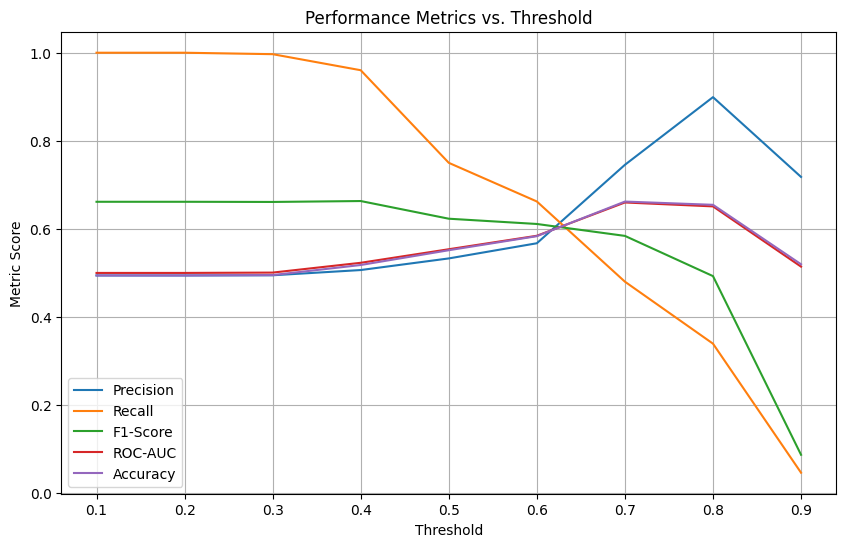

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score

# Define a range of threshold values (e.g., 0.1 to 0.9)
thresholds = np.arange(0.1, 1.0, 0.1)

# Lists to store evaluation metrics
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []
accuracy_scores = []

for threshold in thresholds:
    y_pred_threshold = (y_pred_proba[:, 1] >= threshold).astype(int)  # Convert probabilities to binary predictions

    precision = precision_score(y_test, y_pred_threshold)
    recall = recall_score(y_test, y_pred_threshold)
    f1 = f1_score(y_test, y_pred_threshold)
    roc_auc = roc_auc_score(y_test, y_pred_threshold)
    accuracy = accuracy_score(y_test, y_pred_threshold)

    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    roc_auc_scores.append(roc_auc)
    accuracy_scores.append(accuracy)

# Plot the metrics
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision_scores, label='Precision')
plt.plot(thresholds, recall_scores, label='Recall')
plt.plot(thresholds, f1_scores, label='F1-Score')
plt.plot(thresholds, roc_auc_scores, label='ROC-AUC')
plt.plot(thresholds, accuracy_scores, label='Accuracy')

plt.xlabel('Threshold')
plt.ylabel('Metric Score')
plt.title('Performance Metrics vs. Threshold')
plt.legend()
plt.grid(True)
plt.show()
